#**Wine Origin Classification Using K-Nearest Neighbors (KNN) Algorithm**

Wine has been a beverage of choice for centuries, enjoyed for its diverse flavors and characteristics. The origin of a wine can significantly impact its taste and quality. In this project, we will dive together into the fascinating world of wine classification by leveraging the power of machine learning, specifically the **K-Nearest Neighbors (KNN) Algorithm**.

The goal of this project is to accurately classify the origin of wines based on their chemical composition. We will utilize the Wine Data Set from the UCI Machine Learning Repository, these data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different varieties. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

With the aid of the KNN algorithm, we aim to create a model that can distinguish between these wine varieties with precision. To achieve this, we will explore **three different values of k**, a crucial hyperparameter in the KNN algorithm, and make informed decisions regarding data preprocessing and model evaluation. We will use **all 13 available features** in the dataset to train and test our classifier.

The features are:
* Alcohol
* Malic acid
* Ash
* Alcalinity of ash  
* Magnesium
* Total phenols
* Flavanoids
* Nonflavanoid phenols
* Proanthocyanins
* Color intensity
* Hue
* OD280/OD315 of diluted wines
* Proline

The project will provide insights into the performance of the KNN algorithm in wine classification, showcasing metrics such as accuracy, precision, recall, and F1-score for individual classes and overall accuracy. Additionally, we will present the confusion matrix to gain a deeper understanding of the model's classification performance.

To summarize:

1. Import libraries
2. Import dataset
3. Explore the dataset
4. Split the dataset into training and test sets
5. Scale the features
6. Use GridSearchCV for hyperparameter tuning
7. Select two different values of k base on GridSearchCV
8. Use the K-Nearest Neighbors (KNN) algorithm to classify wine origin based on chemical analysis data
9. Display the confusion matrix
10. Calculate and display accuracy, precision, recall, and f1-score per class and overall
11. Optimization of KNN algorithm with a pipeline

You can find more details for the dataset [here](http://archive.ics.uci.edu/ml/datasets/Wine).

Download the dataset from [here](https://drive.google.com/file/d/1OKzRlTnmJavmXBJjRhUZO_VA-u_dqylN/view?usp=share_link)

Join me on this journey as we explore the potential of machine learning in the world of oenology and discover how KNN can help us identify the origin of wines with finesse and accuracy.

Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report

I'm using the Google Colab Environment

In [2]:
# Access files and data stored in Google Drive within Colab environment
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import data

In [3]:
# Access a file in Google Drive
data_path = '/content/drive/MyDrive/Dataset/wine-data.csv'

# Read a CSV file into a DataFrame
df = pd.read_csv(data_path)

In [4]:
# Display the first 5 rows of the DataFrame 'df'
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Get the dimensions (number of rows and columns) of the DataFrame 'df'
df.shape

(178, 14)

In [6]:
# Display information about the DataFrame, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4    Alcalinity of ash            178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8    Nonflavanoid phenols         178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [7]:
# Check and display the count of missing values (NaN) in each column of the DataFrame
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
 Alcalinity of ash              0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
 Nonflavanoid phenols           0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [8]:
# Generate summary statistics for numerical columns in the DataFrame
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [9]:
# Remove leading and trailing whitespaces from column names
df.columns = df.columns.str.strip()

In [10]:
# Get the column names of the DataFrame 'df'
df.columns

Index(['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [11]:
# Get unique values in the 'Class' column
df['Class'].unique()

array([1, 2, 3])

Percentage Distribution

In [12]:
# Calculate and round the percentage distribution of each unique class in the 'Class' column
class_distribution_percentage = round(df['Class'].value_counts(normalize=True, sort=False) * 100)

# Print the percentage distribution
print(class_distribution_percentage)

1    33.0
2    40.0
3    27.0
Name: Class, dtype: float64


Plot a histogram for each column

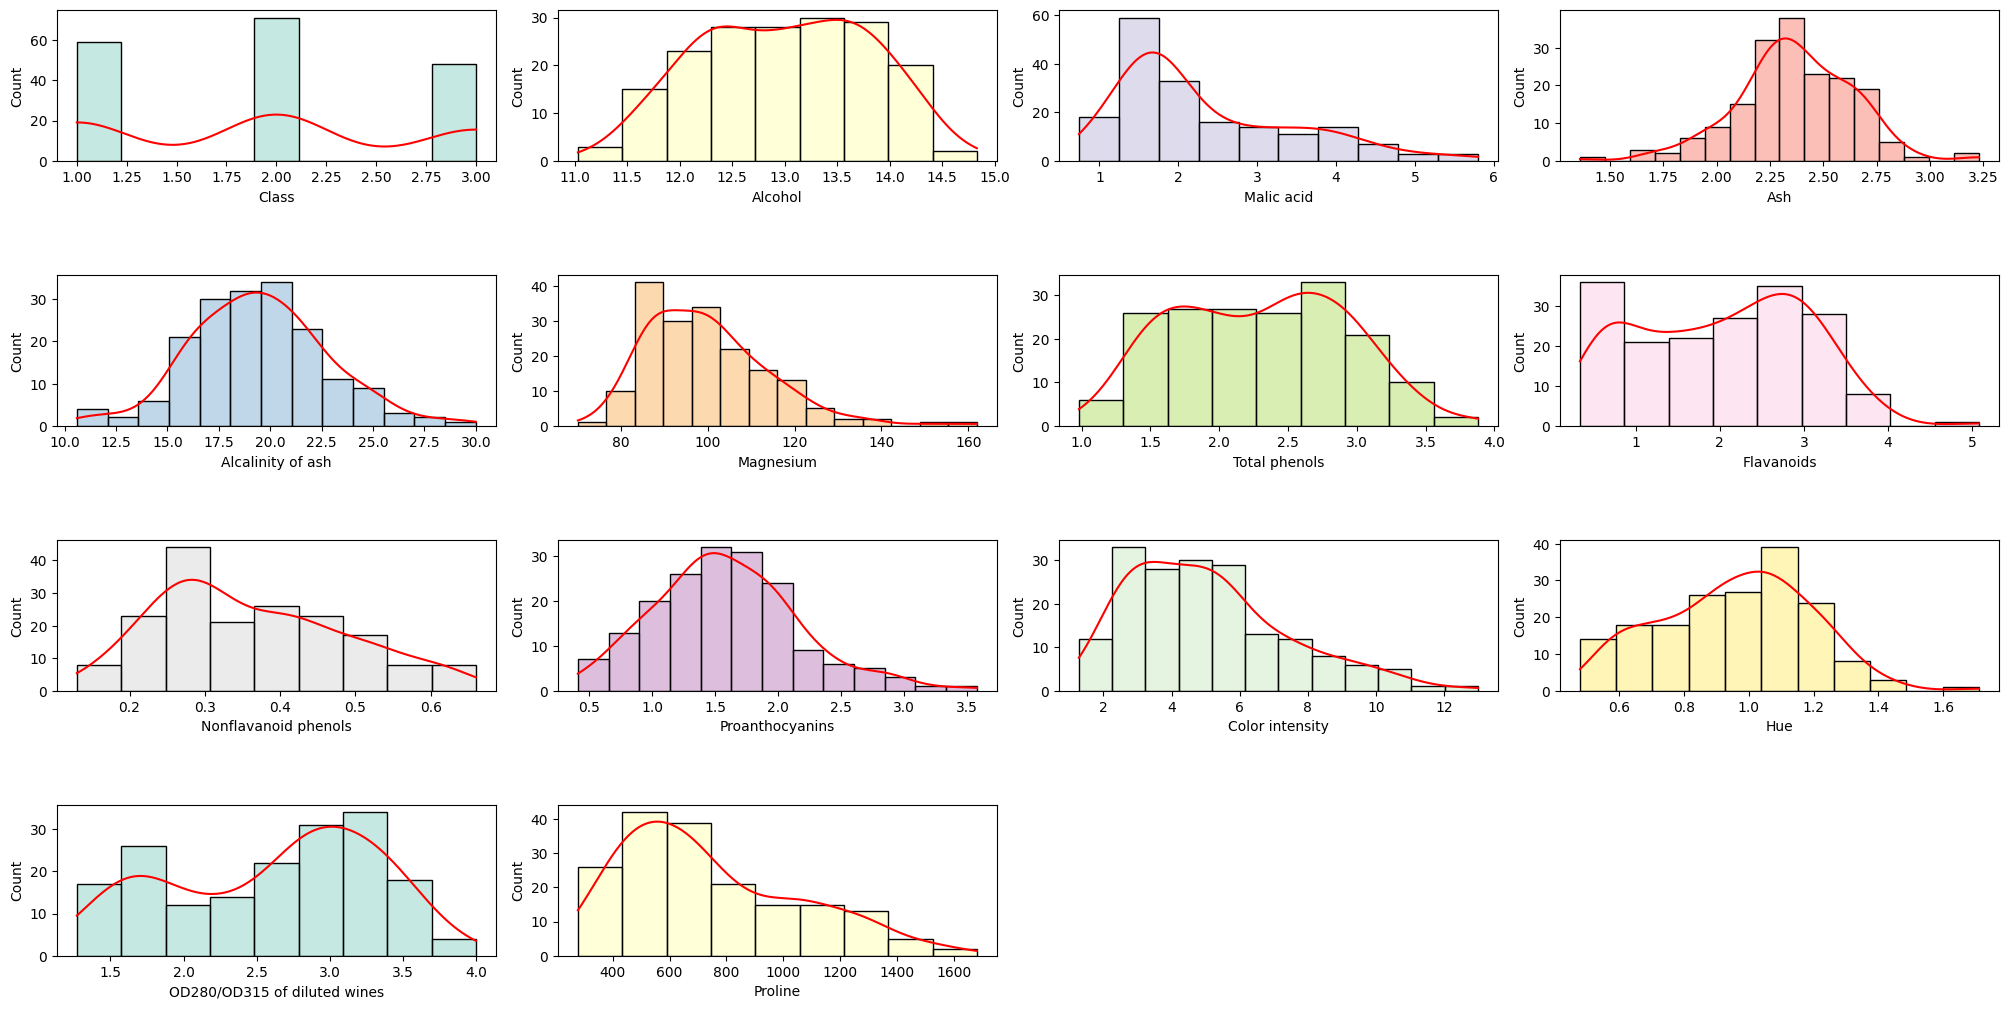

In [13]:
# Create a color palette with distinct colors
palette = sns.color_palette("Set3", n_colors=len(df.columns))

# Create a 4x4 grid of subplots in a figure with a specified size
fig, axs = plt.subplots(ncols=4, nrows=4,  figsize=(20, 10))

# Flatten the 2D array of subplots into a 1D array
axs = axs.flatten()

# Iterate through each column of the DataFrame and create a histogram for each with a different color
for i, (column_name, column_data) in enumerate(df.items()):
    sns.histplot(column_data, ax=axs[i], color=palette[i], kde=True).lines[0].set_color('red')  # Use a distinct color for each histogram

# Remove any empty subplots because of fewer features
for j in range(len(df.columns), 16):
    fig.delaxes(axs[j])

# Adjust the layout of subplots for better spacing
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

# Display the created plots
plt.show()

Plot correlation heatmap

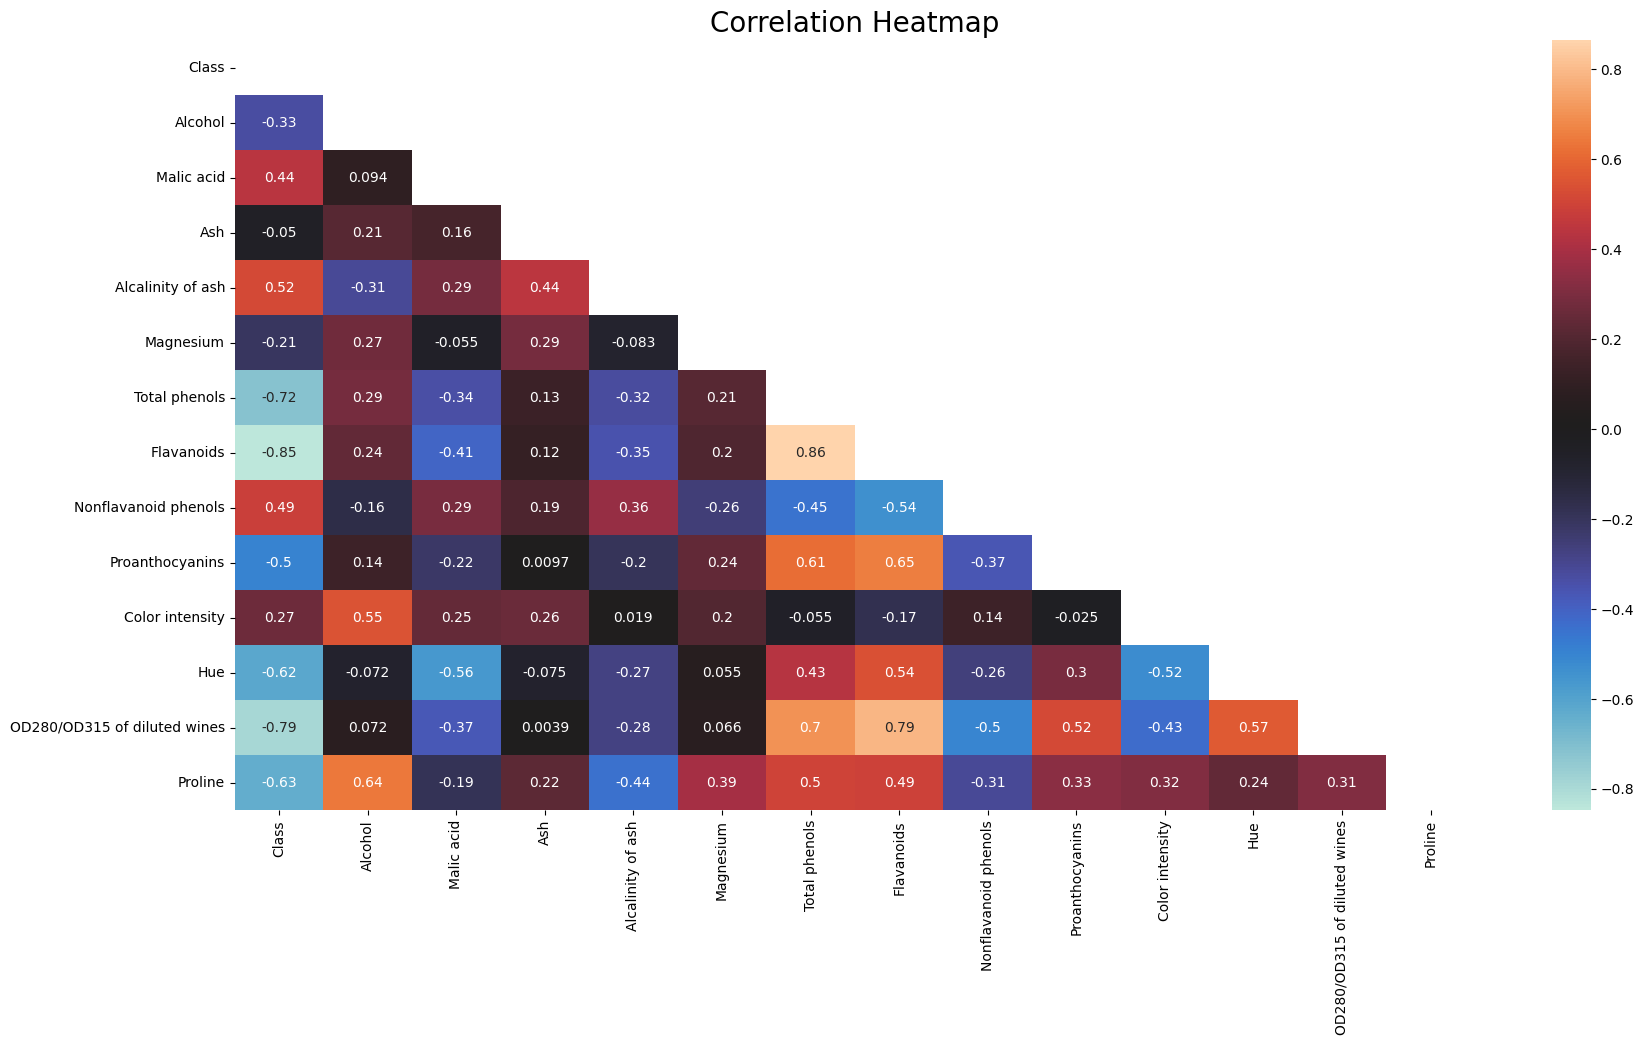

In [14]:
# Create a matplotlib figure with a specified figsize
plt.figure(figsize=(20, 10))

# Set the title for the figure
plt.title('Correlation Heatmap',fontsize = 20)

# We will use the variable called mask to remove the values across the heatmap diagonally as it will be the same
mask = np.triu(np.ones_like(df.corr()))

# Create a correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap = 'icefire', mask = mask)

# Finally, display the figure
plt.show()

Separating features from the target variable

In [15]:
# Extract the feature variables (X) from the DataFrame 'df' by dropping the 'Class' column
X = df.drop(['Class'], axis=1).values

# Extract the target variable (y) from the 'Class' column of the DataFrame 'df'
y = df['Class'].values

Split data into train and test subsets

In [16]:
# Splitting the dataset into training and testing sets with a test size of 25%.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

Standardize features by removing the mean and scaling to unit variance

In [17]:
# Create a StandardScaler object to scale the features.
scaler = StandardScaler()

# Fit the scaler to the training data and transform it to standardize the training features.
X_train_sc = scaler.fit_transform(X_train)

# Transform the testing features using the same scaler to ensure consistent scaling.
X_test_sc = scaler.transform(X_test)

Hyperparameter Tuning for K-Nearest Neighbors Classifier

In [18]:
# Create an empty list to store the best hyperparameter values
best_parameters = []

# Initialize a counter variable
kk = 0

# Iterate over a set of values for 'i', which represent different values for 'cv' in GridSearchCV
for i in np.array([5,10]):
    # Define the hyperparameter grid for KNeighborsClassifier
    grid = {'n_neighbors': list(range(1, 16))}

    # Create a GridSearchCV object for hyperparameter tuning
    est = GridSearchCV(KNeighborsClassifier(), grid, scoring='balanced_accuracy', n_jobs=-1, cv=i, verbose=0)

    # Fit the GridSearchCV object to the scaled training data (X_train_sc) and corresponding labels (y_train)
    est.fit(X_train_sc, y_train)

    # Get the best value of 'n_neighbors' hyperparameter
    best_parameters.append(est.best_params_['n_neighbors'])

    # Print the best value of 'n_neighbors' hyperparameter
    print(f'\033[4mk = {best_parameters[kk]}\033[0m')  # Print the best 'n_neighbors' value with formatting

    # Increment the counter
    kk += 1

    # Print the accuracy achieved by the best model found by GridSearchCV
    print(f'Accuracy = {round(est.best_score_, 4)}\n')

k = 12
Accuracy = 0.9564

k = 11
Accuracy = 0.97



Evaluation of K-Nearest Neighbors Models with Best Hyperparameters

In [19]:
# Iterate through a list of best_parameters
for i in range(len(best_parameters)):

  # Create a K-Nearest Neighbors classifier with the current value of best_parameters[i]
  model = KNeighborsClassifier(n_neighbors = best_parameters[i])

  # Fit the model to the training data
  model.fit(X_train_sc, y_train)

  # Make predictions on the test data
  predictions = model.predict(X_test_sc)

  # Calculate the confusion matrix
  cm = confusion_matrix(y_test, predictions)

  # Print the value of k (number of neighbors) for this iteration
  print(f'\033[4mk = {best_parameters[i]}\033[0m', '\n')

  # Print the confusion matrix
  print('Confusion Matrix\n', cm, '\n')

  # Print the classification report, which includes various metrics for evaluating the model's performance
  print('Classification Report:\n\n', classification_report(y_test, predictions),'\n\n')

k = 12 

Confusion Matrix
 [[15  0  0]
 [ 1 16  1]
 [ 0  0 12]] 

Classification Report:

               precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94        18
           3       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45
 


k = 11 

Confusion Matrix
 [[15  0  0]
 [ 1 16  1]
 [ 0  0 12]] 

Classification Report:

               precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.89      0.94        18
           3       0.92      1.00      0.96        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45
 




###Optimization of KNN algorithm with a pipeline

Create pipeline

In [20]:
# Create a pipeline with two steps: data scaling and classification
pipe = Pipeline([
    ('scaler', StandardScaler()),        # Step 1: Data scaling using StandardScaler
    ('classifier', KNeighborsClassifier())  # Step 2: Classification using KNeighborsClassifier
])

Parameters for GridSearchCV

In [21]:
# Define a parameter grid for hyperparameter tuning
parameters = {
    'scaler': [StandardScaler(), MinMaxScaler(), Normalizer(), MaxAbsScaler()],  # Try different scalers
    'classifier': [KNeighborsClassifier()],  # Use the KNeighborsClassifier for this grid search
    'classifier__n_neighbors': list(range(1, 16))  # Hyperparameter tuning for the number of neighbors
}

Hyperparameter Tuning

In [22]:
# Create a GridSearchCV object for hyperparameter tuning
est = GridSearchCV(pipe, parameters, scoring='balanced_accuracy', n_jobs=-1, cv=10, verbose=0)

# Fit the GridSearchCV object to the training data (X_train) and corresponding labels (y_train)
est.fit(X_train, y_train)

# Get the best value of 'n_neighbors' hyperparameter
best_parameter = est.best_params_['classifier__n_neighbors']

# Print the best value of 'n_neighbors' hyperparameter
print(f'\033[4mk = {best_parameter}\033[0m')  # Print the best 'n_neighbors' value with formatting

# Print the accuracy achieved by the best model found by GridSearchCV
print(f'Accuracy = {round(est.best_score_, 4)}\n')

k = 7
Accuracy = 0.9767



The best pipeline

In [23]:
# Set 'pipe' to the best estimator found by grid search
pipe = est.best_estimator_

Fit the pipeline

In [24]:
# Fit the best estimator to the training data
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=7))])

In [25]:
# Scale the test data using  MinMaxScaler
X_test_sc = pipe.named_steps['scaler'].transform(X_test)

Pipeline predictions

In [26]:
# Make predictions on the scaled test data
predictions = pipe.named_steps['classifier'].predict(X_test_sc)

Confusion matrix

In [27]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

Print pipelines confusion matrix and classification report

In [28]:
# Print the best value of 'n_neighbors' hyperparameter
print(f'\033[4mk = {best_parameter}\033[0m \n')  # Print the best 'n_neighbors' value with formatting

# Print the confusion matrix
print('Confusion Matrix\n', cm, '\n')

# Print the classification report, which includes various metrics for evaluating the model's performance
print('Classification Report:\n\n', classification_report(y_test, predictions),'\n\n')

k = 7 

Confusion Matrix
 [[15  0  0]
 [ 1 17  0]
 [ 0  0 12]] 

Classification Report:

               precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        18
           3       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45
 




#Conclusion
In conclusion, by employing pipeline and an organized hyperparameter search strategy, it successfully improves the KNN classifier's performance on the given dataset. The pipeline ensures data consistency and mitigates potential issues, while the systematic hyperparameter tuning optimizes the model's configuration. The comprehensive evaluation provides insights into the model's strengths and weaknesses. Overall, this approach results in a more accurate, robust, and well-tuned KNN classifier, ready to make informed predictions on new data.

#Thank You!!!